In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'CA01 Bitcoin Ethereum Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
data.shape


(8011, 6)

In [4]:
data.describe

<bound method NDFrame.describe of             Date Coin      Open      High       Low     Close
0     12/01/2023  Eth  2,046.20  2,109.79  2,041.36  2,091.25
1     11/30/2023  Eth  2,028.52  2,052.12  2,022.81  2,046.19
2     11/29/2023  Eth  2,054.47  2,071.97  2,020.04  2,027.57
3     11/28/2023  Eth  2,014.78  2,076.08  1,996.16  2,054.47
4     11/27/2023  Eth  2,074.18  2,080.54  1,987.31  2,014.87
...          ...  ...       ...       ...       ...       ...
8006         NaN  NaN       NaN       NaN       NaN       NaN
8007         NaN  NaN       NaN       NaN       NaN       NaN
8008         NaN  NaN       NaN       NaN       NaN       NaN
8009         NaN  NaN       NaN       NaN       NaN       NaN
8010         NaN  NaN       NaN       NaN       NaN       NaN

[8011 rows x 6 columns]>

In [5]:
data.head

<bound method NDFrame.head of             Date Coin      Open      High       Low     Close
0     12/01/2023  Eth  2,046.20  2,109.79  2,041.36  2,091.25
1     11/30/2023  Eth  2,028.52  2,052.12  2,022.81  2,046.19
2     11/29/2023  Eth  2,054.47  2,071.97  2,020.04  2,027.57
3     11/28/2023  Eth  2,014.78  2,076.08  1,996.16  2,054.47
4     11/27/2023  Eth  2,074.18  2,080.54  1,987.31  2,014.87
...          ...  ...       ...       ...       ...       ...
8006         NaN  NaN       NaN       NaN       NaN       NaN
8007         NaN  NaN       NaN       NaN       NaN       NaN
8008         NaN  NaN       NaN       NaN       NaN       NaN
8009         NaN  NaN       NaN       NaN       NaN       NaN
8010         NaN  NaN       NaN       NaN       NaN       NaN

[8011 rows x 6 columns]>

In [6]:
data.tail

<bound method NDFrame.tail of             Date Coin      Open      High       Low     Close
0     12/01/2023  Eth  2,046.20  2,109.79  2,041.36  2,091.25
1     11/30/2023  Eth  2,028.52  2,052.12  2,022.81  2,046.19
2     11/29/2023  Eth  2,054.47  2,071.97  2,020.04  2,027.57
3     11/28/2023  Eth  2,014.78  2,076.08  1,996.16  2,054.47
4     11/27/2023  Eth  2,074.18  2,080.54  1,987.31  2,014.87
...          ...  ...       ...       ...       ...       ...
8006         NaN  NaN       NaN       NaN       NaN       NaN
8007         NaN  NaN       NaN       NaN       NaN       NaN
8008         NaN  NaN       NaN       NaN       NaN       NaN
8009         NaN  NaN       NaN       NaN       NaN       NaN
8010         NaN  NaN       NaN       NaN       NaN       NaN

[8011 rows x 6 columns]>

In [7]:
data['Date'] = pd.to_datetime(data['Date'])


C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_2764\1258276688.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [8]:
price_columns = ['Open', 'High', 'Low', 'Close']
for col in price_columns:
    data[col] = data[col].str.replace(',', '').astype(float)

In [9]:
missing_values = data.isnull().sum()


In [10]:
missing_values = data.isnull().sum()


In [11]:
data_cleaned_drop = data.dropna()


In [12]:
data_cleaned_fill = data.copy()
for col in price_columns:
    data_cleaned_fill[col] = data_cleaned_fill[col].fillna(data_cleaned_fill[col].mean())

In [13]:
missing_values_drop = data_cleaned_drop.isnull().sum()
missing_values_fill = data_cleaned_fill.isnull().sum()

(missing_values_drop, missing_values_fill)


(Date     0
 Coin     0
 Open     0
 High     0
 Low      0
 Close    0
 dtype: int64,
 Date     131
 Coin     131
 Open       0
 High       0
 Low        0
 Close      0
 dtype: int64)

In [14]:
data_cleaned = data.dropna(subset=['Date', 'Coin'])


In [33]:
ethereum_data = df[df['Coin'] == 'Eth']
ethereum_data_no_duplicates = ethereum_data.drop_duplicates()
df.loc[df['Coin'] == 'Eth', :] = ethereum_data_no_duplicates
print(df.shape)
print(df.head())


(7880, 7)
        Date Coin     Open     High      Low    Close  Price_Range
0 2023-12-01  Eth  2046.20  2109.79  2041.36  2091.25        68.43
1 2023-11-30  Eth  2028.52  2052.12  2022.81  2046.19        29.31
2 2023-11-29  Eth  2054.47  2071.97  2020.04  2027.57        51.93
3 2023-11-28  Eth  2014.78  2076.08  1996.16  2054.47        79.92
4 2023-11-27  Eth  2074.18  2080.54  1987.31  2014.87        93.23


In [34]:
bitcoin_data = df[df['Coin'] == 'Bitcoin']
bitcoin_data_no_duplicates = bitcoin_data.drop_duplicates()
df.loc[df['Coin'] == 'Bitcoin', :] = bitcoin_data_no_duplicates
print("Number of duplicate rows removed:", len(bitcoin_data) - len(bitcoin_data_no_duplicates))
print(df.head())


Number of duplicate rows removed: 0
        Date Coin     Open     High      Low    Close  Price_Range
0 2023-12-01  Eth  2046.20  2109.79  2041.36  2091.25        68.43
1 2023-11-30  Eth  2028.52  2052.12  2022.81  2046.19        29.31
2 2023-11-29  Eth  2054.47  2071.97  2020.04  2027.57        51.93
3 2023-11-28  Eth  2014.78  2076.08  1996.16  2054.47        79.92
4 2023-11-27  Eth  2074.18  2080.54  1987.31  2014.87        93.23


In [35]:
df.loc[df['Coin'] == 'Eth', :] = ethereum_data_no_duplicates


In [36]:
df.loc[df['Coin'] == 'Eth', :] = ethereum_data_no_duplicates


In [37]:
summary_stats = data_cleaned.describe()

In [38]:
df = data_cleaned

In [39]:
df.dtypes

Date           datetime64[ns]
Coin                   object
Open                  float64
High                  float64
Low                   float64
Close                 float64
Price_Range           float64
dtype: object

In [40]:
summary_stats = df.describe()


In [41]:
# Trend Analysis - Mean Closing Price by Coin Over Time
trend_analysis = df.pivot_table(values='Close', index='Date', columns='Coin', aggfunc='mean')



In [42]:
# Volatility Analysis - Average Daily Price Range (High - Low)
df['Price_Range'] = df['High'] - df['Low']
volatility_analysis = df.groupby('Coin')['Price_Range'].mean()

C:\Users\Luke Holmes\AppData\Local\Temp\ipykernel_2764\888209929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Range'] = df['High'] - df['Low']


In [43]:
# Comparative Analysis - Mean Closing Price of Bitcoin vs. Ethereum
comparative_analysis = df.groupby('Coin')['Close'].mean()


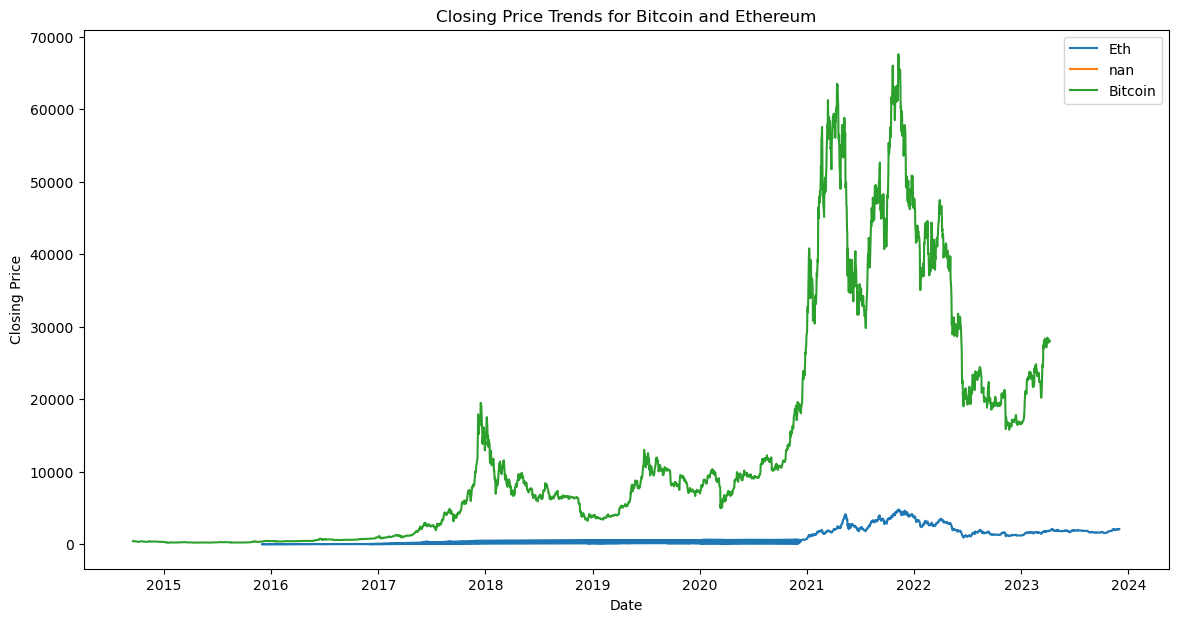

In [44]:
# Visualization
# Time Series Plot of Closing Price Trends
plt.figure(figsize=(14, 7))
for coin in df['Coin'].unique():
    subset = df[df['Coin'] == coin]
    plt.plot(subset['Date'], subset['Close'], label=coin)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Trends for Bitcoin and Ethereum')
plt.legend()
plt.show()
